In [6]:
from PIL import Image
import sympy
import math
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Question 1

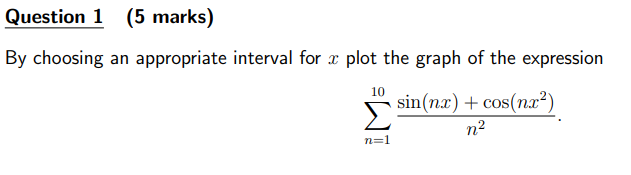

In [16]:
Q1 = Image.open('Q1.png')
Q1

### Define the expression to sum over n from 1 to 10

In [19]:
def sum(x):
    result = 0
    for n in range(1,11):
        result += (np.sin(n * x) + np.cos(n * x**2)) / n**2
    return result

### Create an array of x values from 0 to 10

In [22]:
value_x = np.linspace(0, 10, 1000)
value_y = [sum(x) for x in value_x]

### Plot the graph

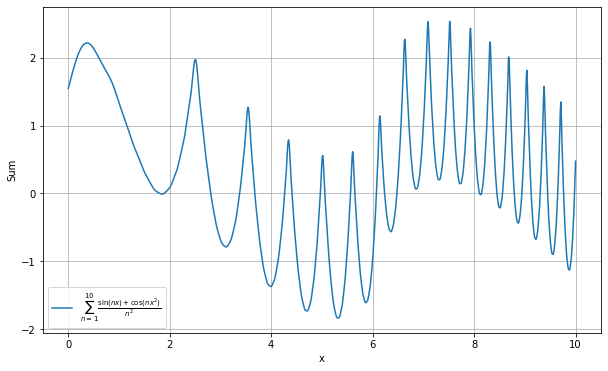

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(value_x, value_y, label=r'$\sum_{n=1}^{10} \frac{\sin(nx) + \cos(nx^2)}{n^2}$')
plt.xlabel('x')
plt.ylabel('Sum')
plt.grid(True)
plt.legend()
plt.show()

# Question 2

In [ ]:
Q2 = Image.open('Q2.png')
Q2

### Check if a number is prime

In [167]:
def primeQ(num):
    if num == 0 or num == 1:
        return False
    elif num == 2:
        return True
    elif num % 2 == 0:
        return False
    for i in range(3, n//2+1):
        if num % i == 0:
            return False
    return True

### Count prime numbers between n and 2n

In [169]:
def pc(n):
    count = 0
    for num in range(n + 1, 2 * n + 1):
        if primeQ(num):
            count += 1
    return count

### Create lists for n values and primes

In [171]:
n_values = np.arange(2, 101)
pc = [pc(n) for n in n_values]

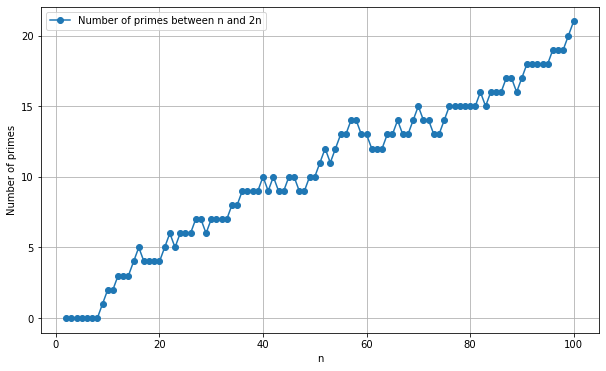

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, pc, marker='o', label="Number of primes between n and 2n")
plt.xlabel('n')
plt.ylabel('Number of primes')
plt.grid(True)
plt.legend()
plt.show()

# Question 3

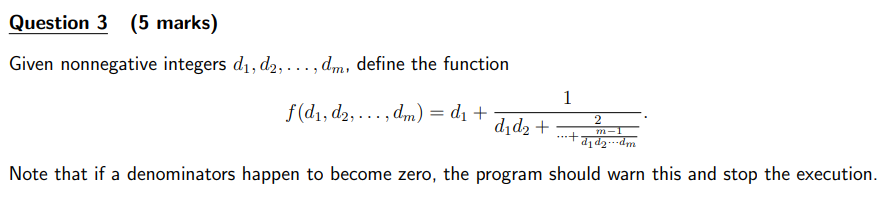

In [17]:
Q3 = Image.open('Q3.png')
Q3

In [308]:
def f(d_values):
    # Check if the d values are nonnegative
    m = len(d_values)
    for d in d_values:
        if d < 0:
            return "All values must be non-negative integers."

    product = 1
    for d in d_values:
        product *= d
        if product == 0: 
            return "Denominator cannot become zero."
    result = (m - 1) / product
    
    for i in range(m - 1, 0, -1):
        for j in range(i + 1):
            product *= d_values[j]
        denominator = product + result
        if denominator == 0:
            return "Denominator cannot become zero."
        result = (m - 1) / denominator
        
    result = d_values[0] + result
    return result 

In [306]:
d_values = [1, 2, 3, 4, 5]
f(d_values) 

1.000000964506173

# Question 4

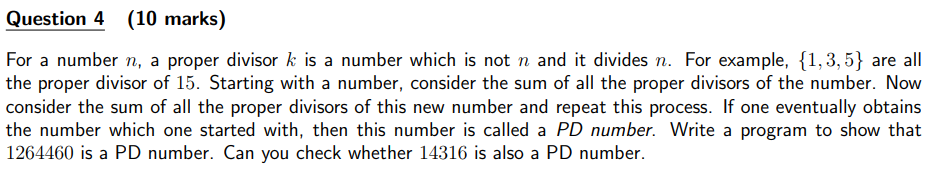

In [19]:
Q4 = Image.open('Q4.png')
Q4

In [402]:
# Function to calculate the sum of proper divisors of a number
def proper_divisors_sum(n):
    divisors_sum = 1  # 1 is a proper divisor for every number
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            divisors_sum += i
            if i != n // i:
                divisors_sum += n // i
    return divisors_sum

In [404]:
# Function to check if a number is a PD number
def is_pd_number(n):
    seen_numbers = set()
    current = n
    while current not in seen_numbers:
        seen_numbers.add(current)
        current = proper_divisors_sum(current)
        if current == n:
            return True
    return False

In [462]:
# Checking for 1264460 and 14316
result1264460 = is_pd_number(1264460)
result_1264460

True

In [420]:
# Checking for 14316
result_14316 = is_pd_number(14316)
result_14316

True

# Question 5

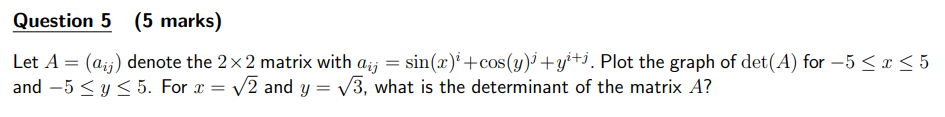

In [21]:
Q5 = Image.open('Q5.png')
Q5

In [39]:
def matrix_A(x, y):
    A = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            A[i, j] = np.sin(x)**i + np.cos(y)**j + y**(i + j)
    return A

In [40]:
x = 5
y= 10
matrix_A(x, y)

array([[ 3.        , 10.16092847],
       [10.04107573, 98.2020042 ]])

In [362]:
# Compute determinant of a 2x2 matrix
def det_A(x, y):
    A = matrix_A(x, y)
    return np.linalg.det(A)

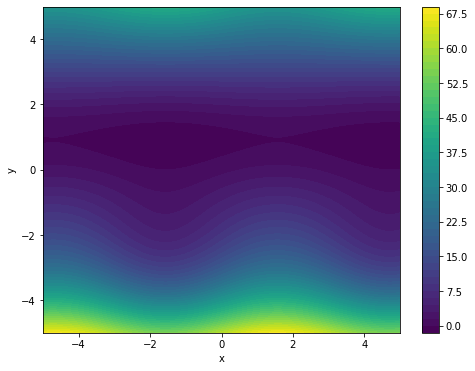

In [376]:
# Create a meshgrid for x and y values
x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute determinant values for each pair (x, y)
Z = np.array([[det_A(x, y) for x in x_vals] for y in y_vals])

# Plotting the determinant values
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [374]:
# Calculate determinant for x = sqrt(2) and y = sqrt(3)
x_val = np.sqrt(2)
y_val = np.sqrt(3)
det_specific = det_A(x_val, y_val)

det_specific

1.9161407587618855

# Question 6

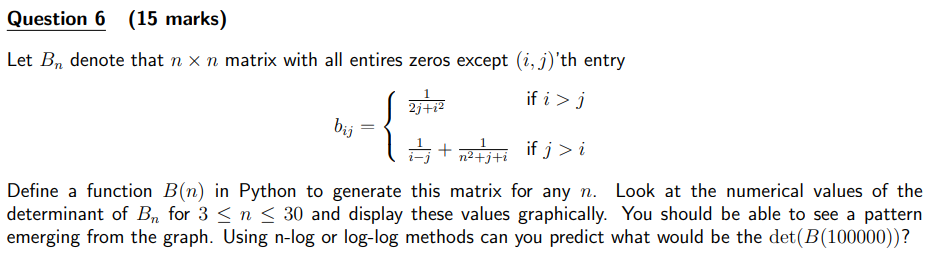

In [23]:
Q6 = Image.open('Q6.png')
Q6

In [55]:
# Define the matrix B(n)
def B(n):
    matrix = np.zeros((n, n))  # Initialize n x n matrix with zeros
    for i in range(n):
        for j in range(n):
            if i > j:
                matrix[i, j] = 1 / (2 * j + i ** 2)
            elif j > i:
                matrix[i, j] = 1 / (i - j) + 1 / (n ** 2 + j + i)
    return matrix

In [57]:
# Compute the determinant for n between 3 and 30
det_values = []
n_values = list(range(3, 30))

for n in n_values:
    matrix = B(n)
    det = np.linalg.det(matrix)  # Calculate determinant
    det_values.append(det)

In [59]:
# Create the plot
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(range(n), range(n))
contour = plt.contourf(X, Y, matrix_30, cmap="viridis")
plt.colorbar(contour)
plt.xlabel('i')
plt.ylabel('j')
plt.show()

NameError: name 'matrix_30' is not defined

<Figure size 576x432 with 0 Axes>